# Feedback Analysis

Helpful articles: 

https://medium.com/@martinpella/naive-bayes-for-sentiment-analysis-49b37db18bf8

https://blog.insightdatascience.com/how-to-solve-90-of-nlp-problems-a-step-by-step-guide

In [16]:
import pandas as pd
import numpy as np
import random
from sklearn.model_selection import train_test_split
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import re

import seaborn as sns
import matplotlib.pyplot as plt

In [17]:
df = pd.read_csv("imdb_labelled.txt",delimiter='\t',header=None)
df.columns = ['message','positive']
df['positive'] = (df['positive'] == 1)

In [18]:
df.head()

,message,positive
0,"A very, very, very slow-moving, aimless movie ...",False
1,Not sure who was more lost - the flat characte...,False
2,Attempting artiness with black & white and cle...,False
3,Very little music or anything to speak of.,False
4,The best scene in the movie was when Gerardo i...,True


In [19]:
X_train, X_test, y_train, y_test = train_test_split(df['message'].values, 
                 df['positive'].values,        
                 test_size=0.2)

In [20]:
df['tokenized_text'] = df['message'].apply(word_tokenize)

In [21]:
vect = CountVectorizer()
tf_train = vect.fit_transform(X_train)
tf_test = vect.transform(X_test)

In [22]:
p = tf_train[y_train==1].sum(0) + 1
q = tf_train[y_train==0].sum(0) + 1
r = np.log((p/p.sum()) / (q/q.sum()))
b = np.log(len(p) / len(q))

### Model 1

In [23]:
pre_preds = tf_test @ r.T + b
preds = pre_preds.T > 0
accuracy = (preds == y_test).mean()
accuracy

0.72

In [24]:
preds = preds.A1
confusion_matrix(preds, y_test)

array([[58, 36],
       [ 6, 50]], dtype=int64)

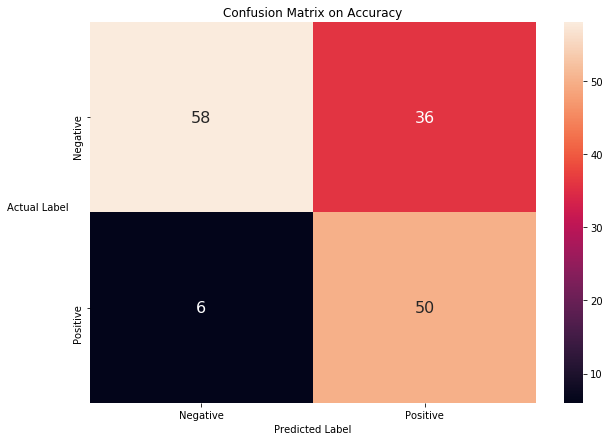

In [25]:
df_cm = pd.DataFrame(confusion_matrix(preds, y_test))

plt.figure(figsize = (10,7))

ax = plt.axes()
sns.heatmap(df_cm, 
            ax = ax,
            annot=True,
            yticklabels=['Negative','Positive'],
            xticklabels=['Negative','Positive'],
            annot_kws={"size": 16})# font size

ax.set_title('Confusion Matrix on Accuracy')
ax.set_xlabel('Predicted Label')
ax.set_ylabel('Actual Label', rotation='horizontal',horizontalalignment='right')
plt.show()

### Model 2

In [26]:
model = LogisticRegression(C=0.2, dual=True)
model.fit(tf_train, y_train)
preds = model.predict(tf_test)
accuracy = (preds == y_test).mean()
accuracy

c:\users\paulb\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\paulb\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.7133333333333334

In [27]:
confusion_matrix(preds, y_test)

array([[45, 24],
       [19, 62]], dtype=int64)

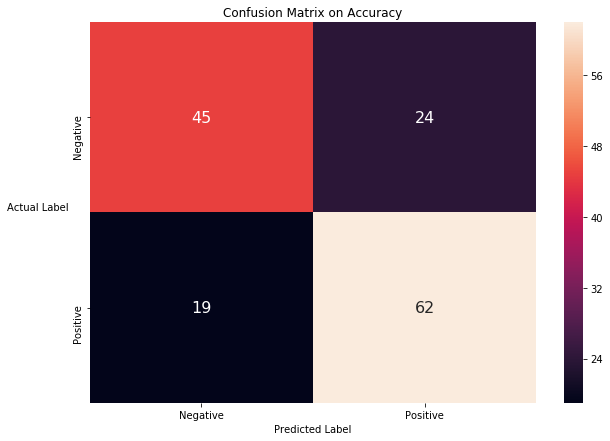

In [28]:
df_cm = pd.DataFrame(confusion_matrix(preds, y_test))

plt.figure(figsize = (10,7))

ax = plt.axes()
sns.heatmap(df_cm, 
            ax = ax,
            annot=True,
            yticklabels=['Negative','Positive'],
            xticklabels=['Negative','Positive'],
            annot_kws={"size": 16})# font size

ax.set_title('Confusion Matrix on Accuracy')
ax.set_xlabel('Predicted Label')
ax.set_ylabel('Actual Label', rotation='horizontal',horizontalalignment='right')
plt.show()

Between the two models, model 1 provides a more accurate model by 6% (which is seen primarily in correctly identifying true Positive reviews).

In [29]:
vocab = vect.get_feature_names()
coef_df = pd.DataFrame({'vocab': vocab, 'coef':model.coef_.reshape(-1)})
pos_top10 = coef_df.sort_values('coef', ascending=False).reset_index(drop=True)[:10]
neg_top10 = coef_df.sort_values('coef').reset_index(drop=True)[:10]

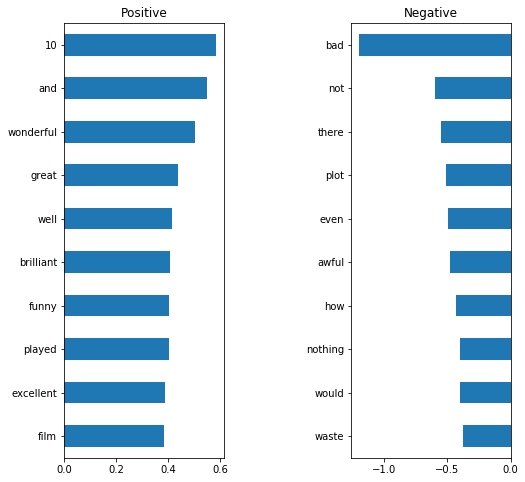

In [30]:
fig, axs = plt.subplots(1, 2, figsize=(8, 8))
fig.subplots_adjust(wspace=0.8)
pos_top10.sort_values('coef').plot.barh(legend=False, ax=axs[0])
axs[0].set_yticklabels(pos_top10['vocab'].values.tolist()[::-1])
axs[0].set_title('Positive');
neg_top10.sort_values('coef', ascending=False).plot.barh(legend=False, ax=axs[1])
axs[1].set_yticklabels(neg_top10['vocab'].values.tolist()[::-1])
axs[1].set_title('Negative');

## Testing the Models Against the Other Data Sets
### Amazon Data Set

In [160]:
df = pd.read_csv("amazon_cells_labelled.txt",delimiter='\t',header=None)
df.columns = ['message','positive']
df['positive'] = (df['positive'] == 1)

In [161]:
X_train, X_test, y_train, y_test = train_test_split(df['message'].values, 
                 df['positive'].values,        
                 test_size=0.2)

In [163]:
df['tokenized_text'] = df['message'].apply(word_tokenize)

In [165]:
vect = CountVectorizer()
tf_train = vect.fit_transform(X_train)
tf_test = vect.transform(X_test)

In [167]:
p = tf_train[y_train==1].sum(0) + 1
q = tf_train[y_train==0].sum(0) + 1
r = np.log((p/p.sum()) / (q/q.sum()))
b = np.log(len(p) / len(q))

In [169]:
pre_preds = tf_test @ r.T + b
preds = pre_preds.T > 0
accuracy = (preds == y_test).mean()
accuracy

0.815

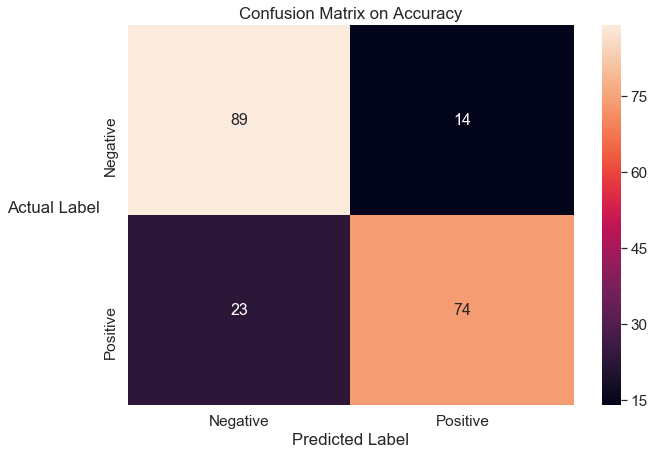

In [170]:
preds = preds.A1
confusion_matrix(preds, y_test)

df_cm = pd.DataFrame(confusion_matrix(preds, y_test))

plt.figure(figsize = (10,7))

ax = plt.axes()
sns.heatmap(df_cm, 
            ax = ax,
            annot=True,
            yticklabels=['Negative','Positive'],
            xticklabels=['Negative','Positive'],
            annot_kws={"size": 16})# font size

ax.set_title('Confusion Matrix on Accuracy')
ax.set_xlabel('Predicted Label')
ax.set_ylabel('Actual Label', rotation='horizontal',horizontalalignment='right')
plt.show()

### Yelp Data Set

In [172]:
df = pd.read_csv("yelp_labelled.txt",delimiter='\t',header=None)
df.columns = ['message','positive']
df['positive'] = (df['positive'] == 1)

In [174]:
X_train, X_test, y_train, y_test = train_test_split(df['message'].values, 
                 df['positive'].values,        
                 test_size=0.2)

In [ ]:
df['tokenized_text'] = df['message'].apply(word_tokenize)

In [175]:
vect = CountVectorizer()
tf_train = vect.fit_transform(X_train)
tf_test = vect.transform(X_test)

In [176]:
p = tf_train[y_train==1].sum(0) + 1
q = tf_train[y_train==0].sum(0) + 1
r = np.log((p/p.sum()) / (q/q.sum()))
b = np.log(len(p) / len(q))

In [177]:
pre_preds = tf_test @ r.T + b
preds = pre_preds.T > 0
accuracy = (preds == y_test).mean()
accuracy

0.78

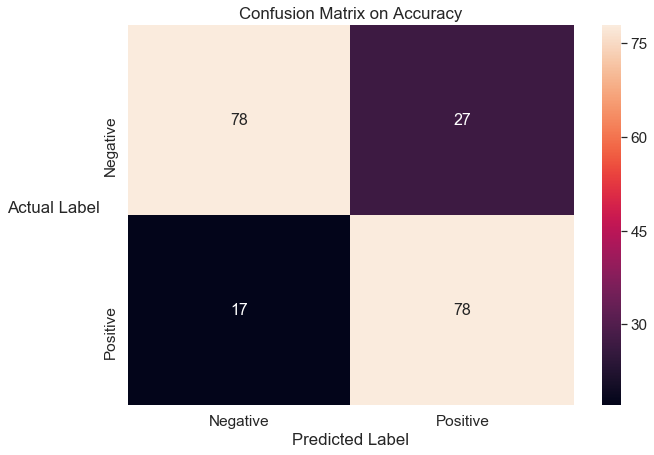

In [178]:
preds = preds.A1
confusion_matrix(preds, y_test)

df_cm = pd.DataFrame(confusion_matrix(preds, y_test))

plt.figure(figsize = (10,7))

ax = plt.axes()
sns.heatmap(df_cm, 
            ax = ax,
            annot=True,
            yticklabels=['Negative','Positive'],
            xticklabels=['Negative','Positive'],
            annot_kws={"size": 16})# font size

ax.set_title('Confusion Matrix on Accuracy')
ax.set_xlabel('Predicted Label')
ax.set_ylabel('Actual Label', rotation='horizontal',horizontalalignment='right')
plt.show()